# Example with classical random walk on a line
## Expected result: an approximation of the normal disribution

In [1]:
import time
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

In [2]:
def random_walk_1d_step(state):
    return state+rnd.choice([-1,1])

In [3]:
def random_walk_1d(walk_state, max_step=1):
    walk_hist = [] # structure for storing the history
    walk_hist.append(walk_state)
    for step in range(1, max_step):
        walk_hist.append(random_walk_1d_step(walk_hist[step-1]))
    return walk_hist

In [4]:
# global paramteres for the classical random walk example
line_size = 500 # dimension of the line
init_state = np.floor(line_size/2) # starting point
max_steps = int(np.floor(line_size/2))-1 # do not walk outside the line

In [5]:
walk = random_walk_1d(init_state, max_steps) # single realization of the walk process

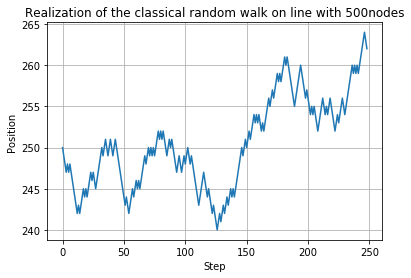

In [6]:
plt.plot(walk)
plt.grid(True);
plt.xlabel('Step');
plt.ylabel('Position');
plt.title('Realization of the classical random walk on line with ' + str(line_size) + 'nodes');

# What do we get on average?

## Multiprocessing version

In [13]:
import functools as ft
import multiprocessing as mp

In [15]:
pool = mp.Pool(processes=3)

In [16]:
no_walks_p = 10000

In [17]:
random_walk_1d_p = ft.partial(random_walk_1d, max_step=max_steps) # partial version for using with map

In [18]:
st = time.time()
walks = pool.map(random_walk_1d_p, np.full(no_walks_p, init_state)) # NOTE: all histories are saved
et = time.time()
print(et - st)

20.924166202545166


In [19]:
walks_p = np.array(walks).T[-1] # get the last element from each history

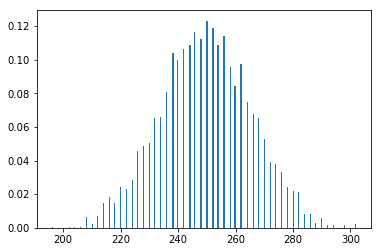

In [20]:
fig, ax = plt.subplots()
n, bins, patches = ax.hist(walks_p, int(line_size/2), density=True);

In [21]:
mu, sg = np.mean(walks_p), np.std(walks_p) # calculate the parameters
npdf = ((1 / (np.sqrt(2 * np.pi) * sg)) * np.exp(-0.5 * (1 / sg * (bins - mu))**2));

In [22]:
mu, sg

(249.5304, 15.803350146092441)

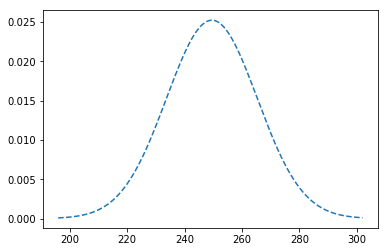

In [23]:
plt.plot(bins, npdf, '--')

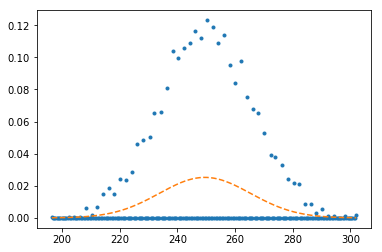

In [24]:
plt.plot(bins[1:], n, '.', bins[1:], npdf[1:], '--')

## Sequential version

In [25]:
no_walks = no_walks_p

In [26]:
st = time.time()
walks = [random_walk_1d(init_state, max_steps)[-1] for i in range(no_walks)] # NOTE: only last elements are stored
et = time.time()
print(et - st)

25.440873861312866


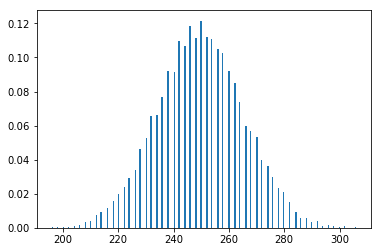

In [27]:
fig, ax = plt.subplots()
n, bins, patches = ax.hist(walks, int(line_size/2), density=True);

In [28]:
mu, sg = np.mean(walks), np.std(walks) # calculate the parameters
npdf = ((1 / (np.sqrt(2 * np.pi) * sg)) * np.exp(-0.5 * (1 / sg * (bins - mu))**2));

In [29]:
mu, sg

(249.6486, 15.545086620537049)

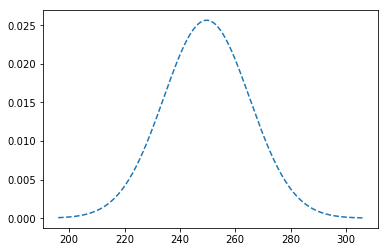

In [30]:
plt.plot(bins, npdf, '--')

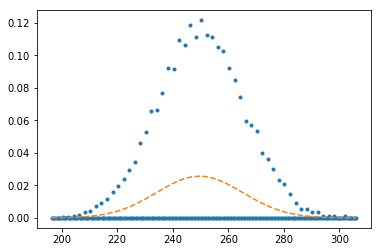

In [31]:
plt.plot(bins[1:], n, '.', bins[1:], npdf[1:], '--')

# Example with quantum states and unitary coin
## Expected resuls: faster propagation